In [1]:
import networkx as nx
import numpy as np
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import baseGrafo
import random
import math
import os
import random
from utils import ler_grafo_dimacs, ler_solucoes_otimas, salvar_resultados

244


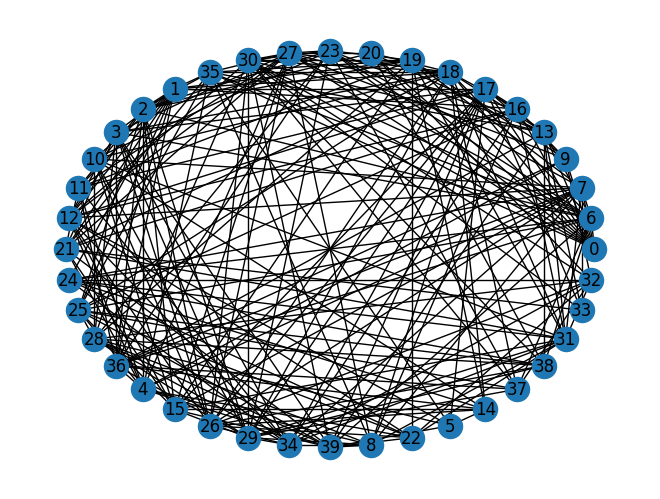

In [2]:
#baseGrafo.grafoImport(30)
G = nx.read_edgelist("grafoBase.csv", delimiter=",")
G = nx.relabel_nodes(G, lambda x: int(x))
print(G.number_of_edges())

nx.draw_circular(G, with_labels=True)

14849


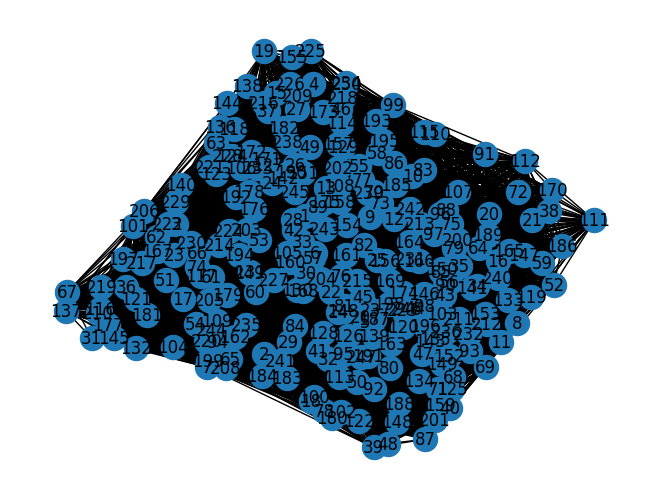

In [2]:
pasta_grafos = "grafos"
resultados_dir = "resultados"
os.makedirs(resultados_dir, exist_ok=True)

solucoes_otimas = ler_solucoes_otimas("solucoes_otimas.csv")

G = ler_grafo_dimacs(os.path.join("grafos", "r250.5.col"))
print(G.number_of_edges())
nx.draw(G, with_labels=True)      

In [ ]:
def custo(coloring):
        # Conta o número de conflitos (nós adjacentes com mesma cor)
        conflitos = sum(1 for u, v in G.edges() if coloring[u] == coloring[v])
        return conflitos

def calcular_custo_delta(G: nx.Graph, coloracao: Dict[int, int], custo_atual: int, v: int, nova_cor: int) -> int:
    """Calcula o novo custo após mover o vértice v para nova_cor."""
    cor_antiga = coloracao[v]
    novo_custo = custo_atual

    # Itera apenas sobre os vizinhos do vértice que mudou de cor
    for vizinho in G.neighbors(v):
        # 1. Subtrai os conflitos que foram removidos
        if coloracao[vizinho] == cor_antiga:
            novo_custo -= 1
        # 2. Adiciona os novos conflitos que foram criados
        if coloracao[vizinho] == nova_cor:
            novo_custo += 1
            
    return novo_custo

def reducao_cores(coloracao, melhor_custo, custo_mundial, n_cores):
    coloring_mundial = coloracao.copy()
    cores_finais =  n_cores # qtd de cores de quando houve o encontro da resposta viavel
    n_cores -= 1
    custo_mundial = melhor_custo # numero de convergencia
    for node in coloring:
        if coloracao[node] >= n_cores:
            coloracao[node] = random.randint(0, n_cores - 1)
            
    return coloring_mundial, coloracao, custo_mundial, n_cores, cores_finais, 


def simulated_annealing_coloring(G, max_iter=500000, i_temp=12400, cooling_rate=0.995, s_ideal):
   # Inicializa coloração aleatória
    coloring, n_colors = baseGrafo.heuristicaGulosa(G)
    
    current_custo = custo(coloring)
    best_coloring = coloring.copy()
    best_custo_i = current_custo # Pego dados da solução inicial feita pela heuristica

    for node in coloring:
        if coloring[node] >= n_colors:
            coloring[node] = random.randint(0, n_colors - 1)
    
    current_custo = custo(coloring) 
    best_custo = current_custo
    print("solução inicial tem", n_colors+1, "cores")
    print("best custo", best_custo)
    temp = i_temp
    f_colors = n_colors
    flag = False
    for i in range(max_iter):
        if(n_colors == s_ideal):
            break
        
        percentual = 0.1 # até 10% dos nós
        k = max(1, int(G.number_of_nodes() * percentual * (temp / i_temp)))

        nodes = random.sample(list(G.nodes()), k)

        # Armazenar cores antigas para possível rollback
        old_colors = {node: coloring[node] for node in nodes}

        # Aplica novas cores aleatórias
        for node in nodes:
            nova_cor = random.randint(0, n_colors)
            coloring[node] = nova_cor
        
        new_custo = custo(coloring)

        dif = new_custo - current_custo
        
        if dif < 0 or random.random() < math.exp(-dif / temp):
            # Aceita nova solução
            current_custo = new_custo
            if new_custo < best_custo:
                best_coloring = coloring.copy()
                best_custo = new_custo
                print("achou melhor custo", best_custo, " temperatura", temp)
        else:
            # Reverte mudança
            for node in nodes:
                coloring[node] = old_colors[node]

        # Opcional: parar se custo for 0 e tentar com menos cores(sem conflitos)
        if best_custo == 0:
            best_coloring_i = coloring.copy()
            print("convergiu em 0, com", n_colors,"cores", "na iteracao", i)
            f_colors =  n_colors # qtd de cores de quando houve o encontro da resposta viavel
            n_colors -= 1
            best_custo_i = best_custo # numero de convergencia
            for node in coloring:
                if coloring[node] >= n_colors:
                    coloring[node] = random.randint(0, n_colors - 1)
            
            print("temperatura:", temp)
        
            flag = True
            #best_coloring_i, coloring, best_custo_i, n_colors, f_colors = reducao_cores(coloring, best_custo, best_custo_i, n_colors)
            best_custo = custo(coloring)
            temp = i_temp/7
            current_custo = best_custo

        if i == max_iter-1 and flag == False:
            best_coloring_i = best_coloring
            best_custo_i = best_custo
            print("bateu o ponto")
            print("temperatura:", temp)
        
        if(i%15000 == 0):
            print("temperatura atual:", temp)
            
            
        temp *= cooling_rate

    return best_coloring_i, best_custo_i, f_colors

# Exemplo de uso
coloring, custo_final, cores= simulated_annealing_coloring(G)

print('Coloração final:', coloring)
print(cores, 'cores')
print('Conflitos restantes:', custo_final)

ERROR! Session/line number was not unique insolução inicial tem 8 cores
best custo 2
temperatura atual: 12400
 database. History logging moved to new session 42
achou melhor custo 1  temperatura 0.11902078328378782
achou melhor custo 0  temperatura 0.06049767781803741
convergiu em 0, com 7 cores na iteracao 2440
temperatura: 0.06049767781803741
achou melhor custo 13  temperatura 0.4183850595142398
achou melhor custo 12  temperatura 0.4142116685455853
achou melhor custo 11  temperatura 0.40802950761608386
achou melhor custo 9  temperatura 0.38808099822261827
achou melhor custo 8  temperatura 0.3709625817595994
achou melhor custo 7  temperatura 0.35817203188264457
achou melhor custo 6  temperatura 0.3458224918923982
achou melhor custo 5  temperatura 0.20430392686858165
achou melhor custo 4  temperatura 0.16802614488492998
achou melhor custo 3  temperatura 0.13749917521720928
achou melhor custo 2  temperatura 0.1017852711287983
achou melhor custo 1  temperatura 0.014338691120001619
achou 

KeyboardInterrupt: 

In [ ]:
def custo(coloring):
        # Conta o número de conflitos (nós adjacentes com mesma cor)
        conflitos = sum(1 for u, v in G.edges() if coloring[u] == coloring[v])
        return conflitos

def calcular_custo_delta(G: nx.Graph, coloracao: Dict[int, int], custo_atual: int, v: int, nova_cor: int) -> int:
    """Calcula o novo custo após mover o vértice v para nova_cor."""
    cor_antiga = coloracao[v]
    novo_custo = custo_atual

    # Itera apenas sobre os vizinhos do vértice que mudou de cor
    for vizinho in G.neighbors(v):
        # 1. Subtrai os conflitos que foram removidos
        if coloracao[vizinho] == cor_antiga:
            novo_custo -= 1
        # 2. Adiciona os novos conflitos que foram criados
        if coloracao[vizinho] == nova_cor:
            novo_custo += 1
            
    return novo_custo

def reducao_cores(coloracao, melhor_custo, custo_mundial, n_cores):
    coloring_mundial = coloracao.copy()
    cores_finais =  n_cores # qtd de cores de quando houve o encontro da resposta viavel
    n_cores -= 1
    custo_mundial = melhor_custo # numero de convergencia
    for node in coloracao:
        if coloracao[node] >= n_cores:
            coloracao[node] = random.randint(0, n_cores)
            
    return coloring_mundial, coloracao, custo_mundial, n_cores, cores_finais, 


def simulated_annealing_coloring(G, max_iter=500000, i_temp=12400, cooling_rate=0.995, s_ideal=None):
   # Inicializa coloração aleatória
    coloring, n_colors = baseGrafo.heuristicaGulosa(G)
    flag = False
    current_custo = custo(coloring)
    best_coloring = coloring.copy()
    best_custo = current_custo
    
    print("solução inicial tem", n_colors+1, "cores")
    print("best custo", best_custo)
    for node in coloring:
        if coloring[node] >= n_colors:
            coloring[node] = random.randint(0, n_colors - 1)
    
    current_custo = custo(coloring) 
    best_custo = current_custo
    temp = i_temp
    f_colors = n_colors
    for i in range(max_iter):
        percentual = 0.1 # até 10% dos nós
        k = max(1, int(G.number_of_nodes() * percentual * (temp / i_temp)))

        nodes = random.sample(list(G.nodes()), k)

        # Armazenar cores antigas para possível rollback
        old_colors = {node: coloring[node] for node in nodes}

        # Aplica novas cores aleatórias
        for node in nodes:
            nova_cor = random.randint(0, n_colors-1)
            coloring[node] = nova_cor
        
        new_custo = custo(coloring)

        dif = new_custo - current_custo
        
        if dif < 0 or random.random() < math.exp(-dif / temp):
            # Aceita nova solução
            current_custo = new_custo
            if new_custo < best_custo:
                best_coloring = coloring.copy()
                best_custo = new_custo
                print("achou melhor custo", best_custo, " temperatura", temp)
        else:
            # Reverte mudança
            for node in nodes:
                coloring[node] = old_colors[node]

        # Opcional: parar se custo for 0 e tentar com menos cores(sem conflitos)
        if best_custo == 0:
           # ### best_coloring_i = coloring.copy()
            print("convergiu em 0, com", n_colors,"cores", "na iteracao", i)
            
            
            best_coloring_i, coloring, best_custo_i, n_colors, f_colors = reducao_cores(coloring, best_custo, best_custo_i, n_colors)
            print("temperatura:", temp)
            flag = True
            best_custo = custo(coloring)
            temp = i_temp/7
            current_custo = best_custo
        
        elif(i%15000 == 0):
            melhor_movimento = None
            melhor_custo_vizinho = float('inf')
            print("busca por melhora forçada:", i,"temperatura:", temp)
            # Identifica os nós com conflito para focar a busca
            nos_conflitantes = {u for u, v in G.edges() if coloring[u] == coloring[v]} | \
                                {v for u, v in G.edges() if coloring[u] == coloring[v]}

           
            # Itera sobre os MOVIMENTOS possíveis, não sobre vizinhos materializados
            for v_conflitante in nos_conflitantes:
                cor_antiga = coloring[v_conflitante]
                for nova_cor in range(n_colors):
                    if nova_cor == cor_antiga:
                        continue

                    # Calcula o custo do movimento de forma barata
                    custo_movimento = calcular_custo_delta(G, coloring, current_custo, v_conflitante, nova_cor)
                    movimento = (v_conflitante, nova_cor)
                
                    # Critério de Aspiração
                    
                    if (custo_movimento < best_custo):
                        if custo_movimento < melhor_custo_vizinho:
                            melhor_custo_vizinho = custo_movimento
                            melhor_movimento = movimento

            if melhor_movimento is not None:    
                # ### Aplica APENAS o melhor movimento encontrado ###
                print(melhor_movimento)
                vertice_movido, nova_cor_movida = melhor_movimento
                
                # Atualiza a coloração e o custo
                coloring[vertice_movido] = nova_cor_movida
                current_custo = melhor_custo_vizinho

                # Atualiza a melhor solução global se necessário
                if current_custo < best_custo:
                    best_coloring = coloring.copy() # Copia apenas quando melhora
                    best_custo = current_custo
                    if best_custo == 0:
                        best_coloring_i, coloring, best_custo_i, n_colors, f_colors = reducao_cores(coloring, best_custo, best_custo_i, n_colors)
                        print("temperatura:", temp)

                        best_custo = custo(coloring)
                        temp = i_temp/7
                        current_custo = best_custo
            else:
                temp *= 1.30
                print("temp:", temp)
            
        if i == max_iter-1 and flag == False:
            best_coloring_i = best_coloring
            best_custo_i = best_custo
            print("bateu o ponto")
            print("temperatura:", temp)
        
       

       
        
        temp *= cooling_rate

    return best_coloring_i, best_custo_i, f_colors

# Exemplo de uso
coloring, custo_final, cores= simulated_annealing_coloring(G)

print('Coloração final:', coloring)
print(cores, 'cores')
print('Conflitos restantes:', custo_final)

solução inicial tem 79 cores
best custo 0
busca por melhora forçada: 0 temperatura: 12400


UnboundLocalError: cannot access local variable 'melhor_movimento' where it is not associated with a value

In [ ]:
def desenhar_grafo_colorido(G, coloring):
    # Cria uma lista de cores para os nós com base na coloração fornecida
    node_colors = [coloring[node] for node in G.nodes()]
    for u, v in G.edges():
        if node_colors[u] == node_colors[v]:
            print("bateu", u ,"e", v)

    # Desenhar o grafo
    pos = nx.spring_layout(G, seed=42)  # layout bonito e fixo
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        cmap=plt.cm.tab10,  # até 10 cores distintas
        node_size=500,
        edge_color='gray',
        font_color='white'
    )
    plt.title("Grafo com Coloração")
    plt.show()

desenhar_grafo_colorido(G, coloring)



In [ ]:
print(list(G.neighbors(5)))
print(coloring[5])
for node in G.nodes:
    if coloring[node] == 1:
        print(node,coloring[node])